In [1]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline 


In [2]:
sns.set_style("darkgrid")
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='#FFE5B4'


# Synopsis

In [3]:
data=pd.read_csv("World-Happiness-Report-2022.csv")

data.head()


Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   
3                      2.43                             1.482   
4                      2.43                             1.501   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   
2                         1.079                                  0.816   
3                         1.172                                  0.772   
4                         1.079                                  0.753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   
3                                       0.698                     0.293   
4                                       0.647                     0.302   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868  
2                                    0.413                2.839  
3                                    0.170                2.967  
4                                    0.384                2.798

In [4]:
data_columns = ["Country name","Regional indicator","Ladder score", "Logged GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]
data = data[data_columns].copy()
happy_df = data.rename( columns = {'Country name':'country_name','Regional indicator':'regional_indicator','Ladder score':'happiness_score', 'Logged GDP per capita':'logged_GDP_per_capita','Social support':'social_support','Healthy life expectancy':'healthy_life_expectancy','Freedom to make life choices':'freedom_to_make_life_choices','Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruption'})

In [5]:
happy_df.shape

(149, 9)

In [6]:
happy_df.columns

Index(['country_name', 'regional_indicator', 'happiness_score',
       'logged_GDP_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')

In [7]:
happy_df.head()

country_name regional_indicator  happiness_score  logged_GDP_per_capita  \
0      Finland     Western Europe            7.842                 10.775   
1      Denmark     Western Europe            7.620                 10.933   
2  Switzerland     Western Europe            7.571                 11.117   
3      Iceland     Western Europe            7.554                 10.878   
4  Netherlands     Western Europe            7.464                 10.932   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0           0.954                     72.0                         0.949   
1           0.954                     72.7                         0.946   
2           0.942                     74.4                         0.919   
3           0.983                     73.0                         0.955   
4           0.942                     72.4                         0.913   

   generosity  perceptions_of_corruption  
0      -0.098                      0.186  
1       0.030                      0.179  
2       0.025                      0.292  
3       0.160                      0.673  
4       0.175                      0.338

In [8]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_name                  149 non-null    object 
 1   regional_indicator            149 non-null    object 
 2   happiness_score               149 non-null    float64
 3   logged_GDP_per_capita         149 non-null    float64
 4   social_support                149 non-null    float64
 5   healthy_life_expectancy       149 non-null    float64
 6   freedom_to_make_life_choices  149 non-null    float64
 7   generosity                    149 non-null    float64
 8   perceptions_of_corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


In [9]:
happy_df.describe()

happiness_score  logged_GDP_per_capita  social_support  \
count       149.000000             149.000000      149.000000   
mean          5.532839               9.432208        0.814745   
std           1.073924               1.158601        0.114889   
min           2.523000               6.635000        0.463000   
25%           4.852000               8.541000        0.750000   
50%           5.534000               9.569000        0.832000   
75%           6.255000              10.421000        0.905000   
max           7.842000              11.647000        0.983000   

       healthy_life_expectancy  freedom_to_make_life_choices  generosity  \
count               149.000000                    149.000000  149.000000   
mean                 64.992799                      0.791597   -0.015134   
std                   6.762043                      0.113332    0.150657   
min                  48.478000                      0.382000   -0.288000   
25%                  59.802000                      0.718000   -0.126000   
50%                  66.603000                      0.804000   -0.036000   
75%                  69.600000                      0.877000    0.079000   
max                  76.953000                      0.970000    0.542000   

       perceptions_of_corruption  
count                 149.000000  
mean                    0.727450  
std                     0.179226  
min                     0.082000  
25%                     0.667000  
50%                     0.781000  
75%                     0.845000  
max                     0.939000

In [10]:
happy_df.isnull().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
logged_GDP_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [11]:
#Plot of Regional Indicator

a=happy_df['regional_indicator'].value_counts().sort_index(ascending=True)
print(a)
px.bar(happy_df,x='regional_indicator',color ="regional_indicator")

Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: regional_indicator, dtype: int64


In [12]:
#bi
# Printing Total Countries

total_country = happy_df.groupby('regional_indicator')[['country_name']].count()
print(total_country)

                                    country_name
regional_indicator                              
Central and Eastern Europe                    17
Commonwealth of Independent States            12
East Asia                                      6
Latin America and Caribbean                   20
Middle East and North Africa                  17
North America and ANZ                          4
South Asia                                     7
Southeast Asia                                 9
Sub-Saharan Africa                            36
Western Europe                                21


In [13]:
#Printing GDP of Different Region
gdp_region = happy_df.groupby('regional_indicator')['logged_GDP_per_capita'].sum()
gdp_region

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_GDP_per_capita, dtype: float64

Text(0, 0.5, '')

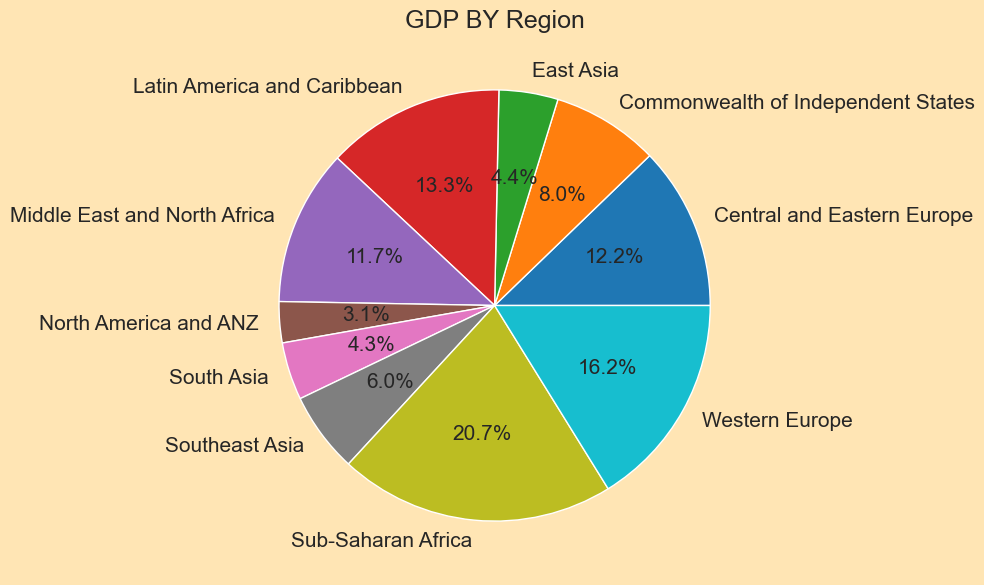

In [14]:
#Pie Chart of GDP By Region
gdp_region = happy_df.groupby('regional_indicator')['logged_GDP_per_capita'].sum()
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title("GDP BY Region")
plt.ylabel('')

<BarContainer object of 10 artists>

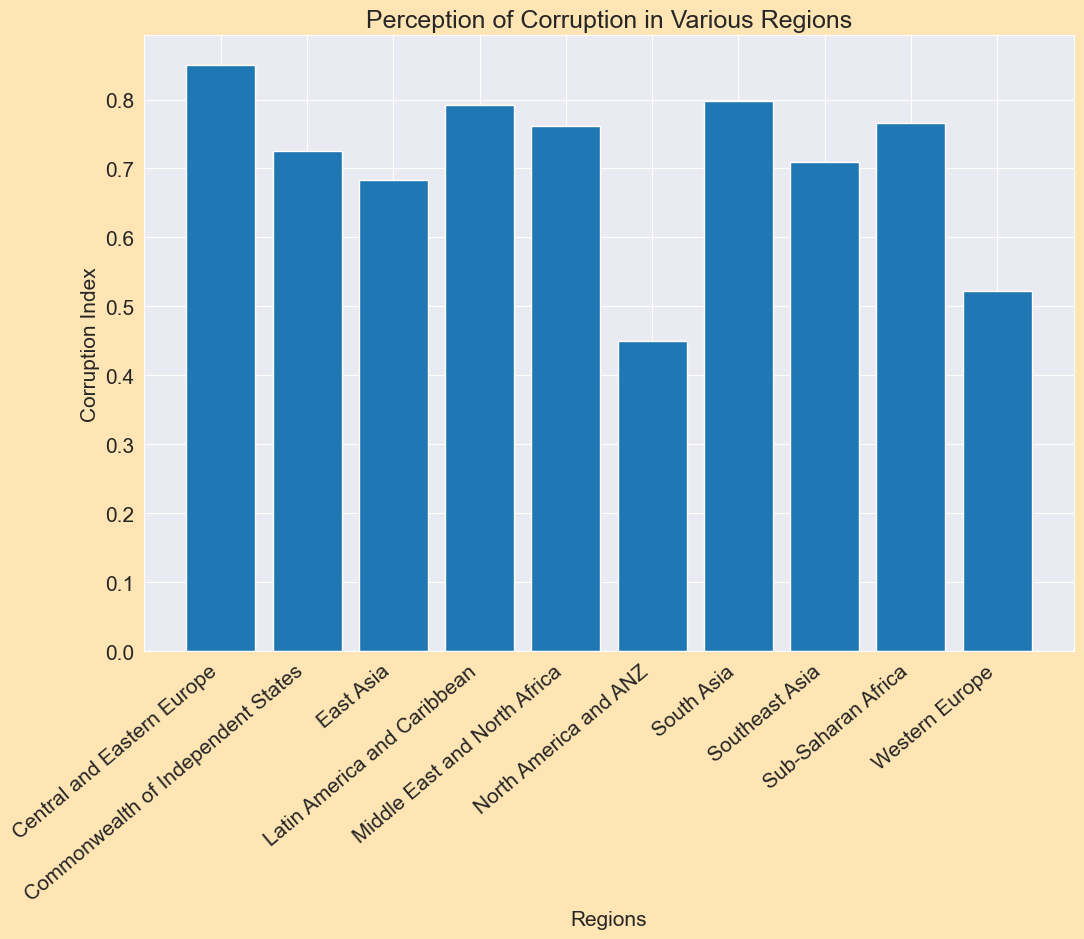

In [15]:
#bi
# Plot Barplot b/w index and perceptions_of_corruption

corruption = happy_df.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
corruption

#bi
plt.rcParams['figure.figsize']=(12,8)
plt.title('Perception of Corruption in Various Regions')
plt.xlabel("Regions",fontsize = 15 )
plt.ylabel("Corruption Index",fontsize = 15)
plt.xticks(rotation = 40 , ha='right')
plt.bar(corruption.index, corruption.perceptions_of_corruption)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_704\2528069060.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\ASUS\AppData\Local\Temp\ipykernel_704\2528069060.py:23: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(831.8358585858584, 0.5, 'Life Expectancy')

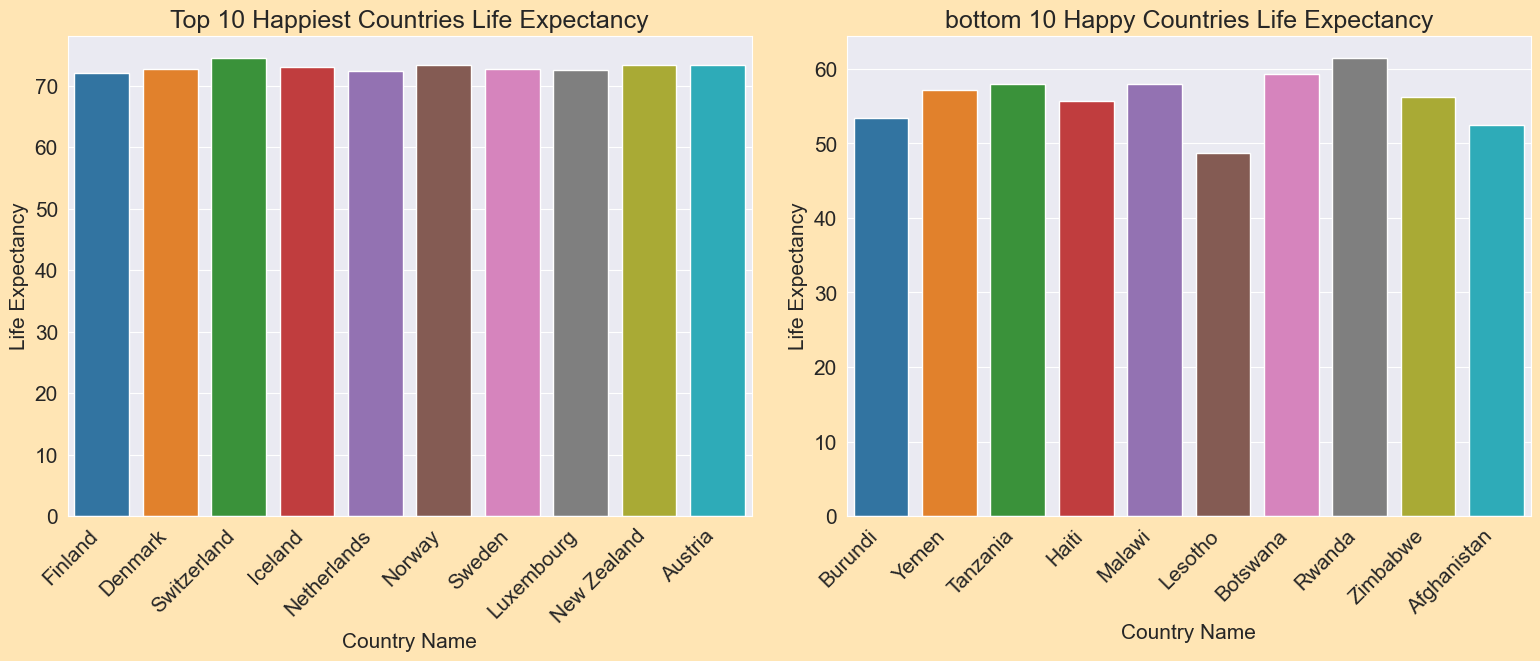

In [25]:
#Plot bar plot of Top 10 Happy country and bottom 10 happy country

top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)
#bi
fig , axes = plt.subplots(1,2, figsize=(16,6))
plt.tight_layout(pad = 2)

# Top 10

xlabels = top_10.country_name
axes[0].set_title("Top 10 Happiest Countries Life Expectancy")
axes[0].set_xticklabels(xlabels , rotation = 45 , ha='right')
sns.barplot(x = top_10.country_name , y = top_10.healthy_life_expectancy, ax = axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')


# Bottom 10

xlabels = bottom_10.country_name
axes[1].set_title("bottom 10 Happy Countries Life Expectancy")
axes[1].set_xticklabels(xlabels , rotation = 45 , ha='right')
sns.barplot(x = bottom_10.country_name , y = bottom_10.healthy_life_expectancy, ax = axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')

<BarContainer object of 10 artists>

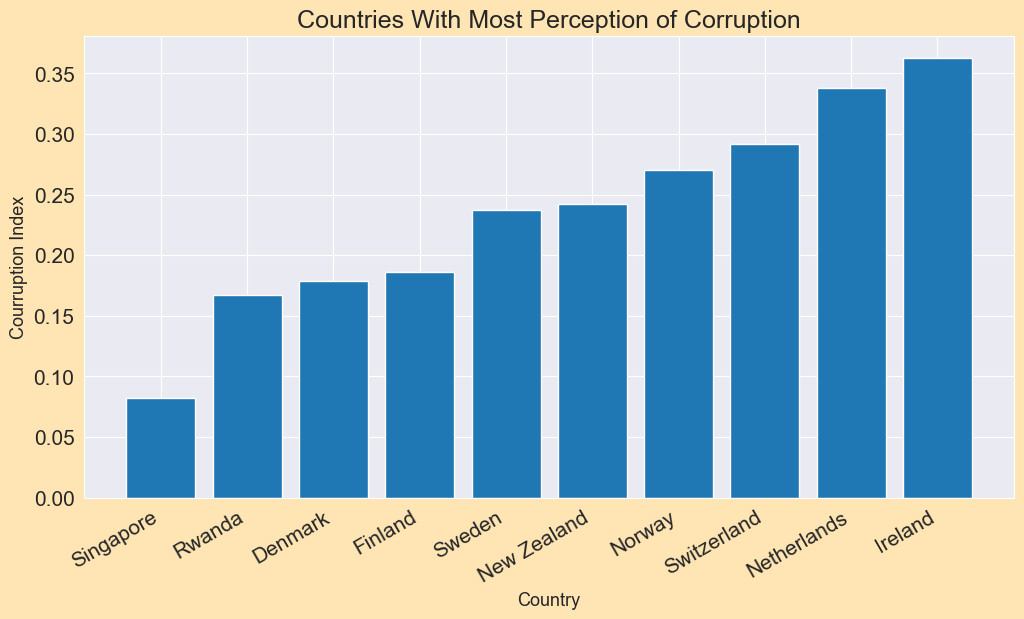

In [18]:
#Barplot b/w country_name and perceptions_of_corruption (top 10)

country = happy_df.sort_values(by = 'perceptions_of_corruption').head(10)
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Countries With Most Perception of Corruption')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Courruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha='right')
plt.bar(country.country_name, country.perceptions_of_corruption)

<BarContainer object of 10 artists>

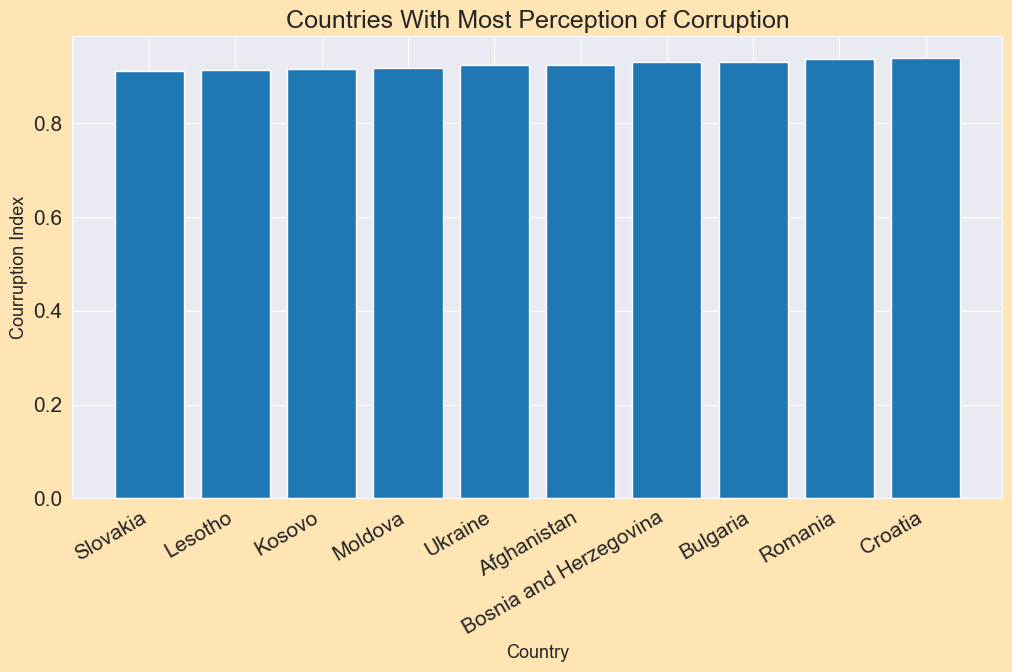

In [19]:
#Barplot b/w country_name and perceptions_of_corruption (Bottom 10)

country = happy_df.sort_values(by = 'perceptions_of_corruption').tail(10)
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Countries With Most Perception of Corruption')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Courruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha='right')
plt.bar(country.country_name, country.perceptions_of_corruption)

Text(0, 0.5, 'GDP Per Capita')

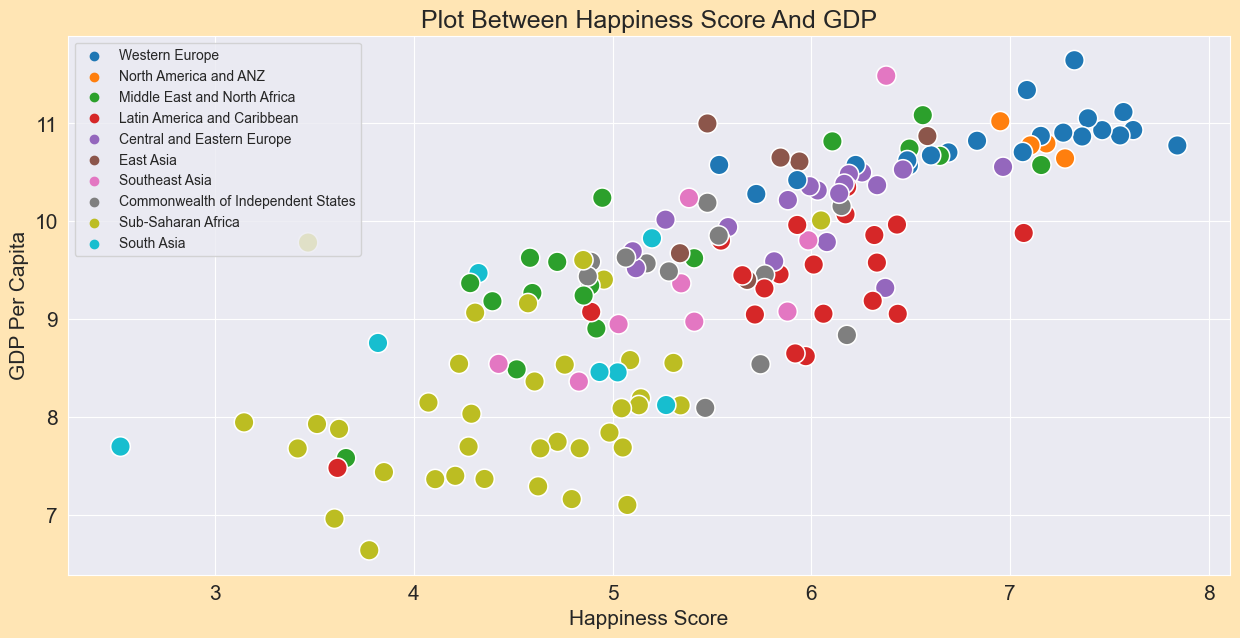

In [20]:

#scatter plot b/w happiness_score and logged_GDP_per_capita

plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot Between Happiness Score And GDP')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.logged_GDP_per_capita, hue = happy_df.regional_indicator, s = 200);

plt.legend (loc = 'upper left', fontsize = '10')
plt.xlabel("Happiness Score")
plt.ylabel("GDP Per Capita")

Text(0, 0.5, 'Happiness Score')

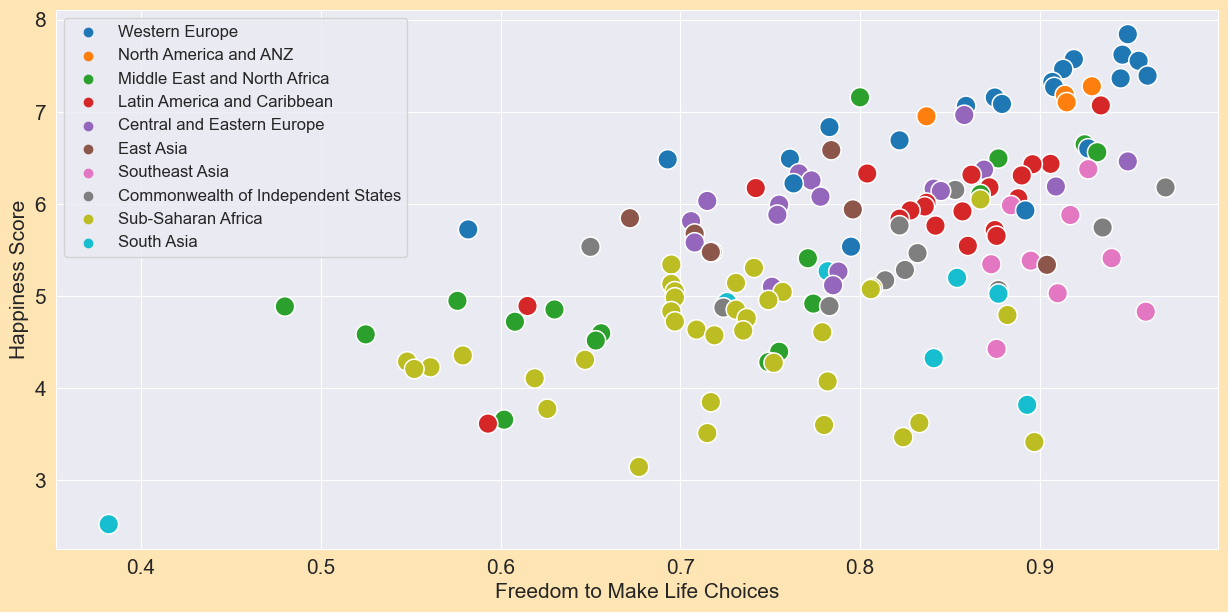

In [21]:
#scatter plot b/w happiness_score and freedom_to_make_life_choices

plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x = happy_df.freedom_to_make_life_choices, y=happy_df.happiness_score , hue = happy_df.regional_indicator , s = 200)
plt.legend(loc = 'upper left', fontsize = 12)
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')

Text(0, 0.5, 'Corruption')

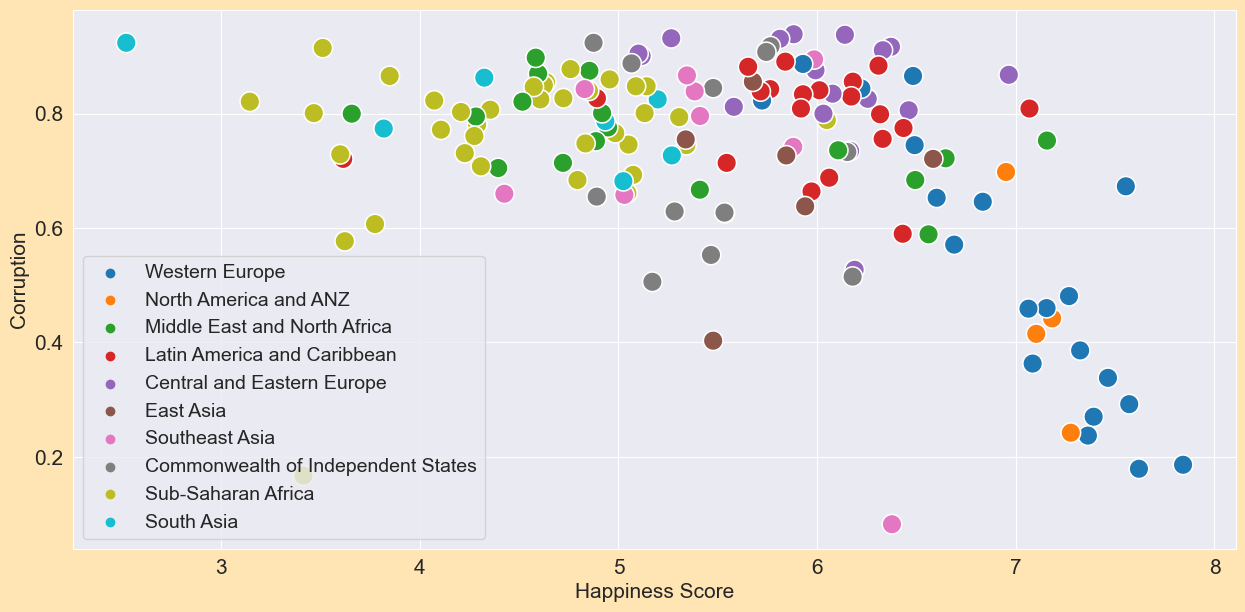

In [22]:
#scatter plot b/w happiness_score and perceptions_of_corruption

plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.perceptions_of_corruption , hue = happy_df.regional_indicator, s = 200)
plt.legend(loc = 'lower left', fontsize = '14')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')

In [23]:
# Happiness_score vs freedom_to_make_life_choices
px.histogram(happy_df,x="happiness_score",y="freedom_to_make_life_choices",color ="regional_indicator",barmode="group")